# 1906277 Notebook CIFAR-100 Object Recognition

This notebook shows my process and implementaion when searching for the best method for object recognition with the CIFAR-100 dataset.

# Content:


1.  Imports


2.  Load dataset function, accuracy loss function and  confusion matrix function


3.  Model 1) The Deep Neural Network.

      a. Evaluating the accurracy and loss with test dataset.
      
      b. Display the Accuracy Loss Graph and Summary of model.
      
      c. Display the Confusion Matrix.
      
      
4.  Model 2) The Convolutional Neural Network.

       a. Evaluating the accurracy and loss with test dataset.
       
       b. Display the Accuracy Loss Graph and Summary of model.
       
       c. Display the Confusion Matrix.
       
       
5.  Model 3) The Neural Network.

       a. Evaluating the accurracy and loss with test dataset.
       
       
6.  Model 4) The Deep Convolutional Neural Network.

       a. Evaluating the accurracy and loss with test dataset.
       


## Imports

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
import skimage.feature
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

## Load dataset function, accuracy loss function and  confusion matrix function
The functions to help assist the models for analysis and development.
A function to load the all the necessary datasets for the models.
A function to help display the accuracy loss graph when needed for the models.
A function to help display the confusion matrix when needed for the models.

In [2]:

def load_dataset():

    train_images = np.load("trnImage.npy")
    train_labels_coarse = np.load("trnLabel_coarse.npy")
    train_labels_fine = np.load("trnLabel_fine.npy")
    test_images = np.load("tstImage.npy")
    test_labels_coarse = np.load("tstLabel_coarse.npy")
    test_labels_fine = np.load("tstLabel_fine.npy")
    coarse_labels = pd.read_csv("coarse_labels.csv")
    fine_labels = pd.read_csv("fine_labels.csv")

    print('The shape of the train_images set is: ', np.shape(train_images))
    print('The shape of the train_labels_coarse set is: ', np.shape(train_labels_coarse))
    print('The shape of the train_labels_fine set is: ', np.shape(train_labels_fine))
    print('The shape of the test_images set is: ', np.shape(test_images))
    print('The shape of the test_labels_coarse set is: ', np.shape(test_labels_coarse))
    print('The shape of the test_labels_fine set is: ', np.shape(test_labels_fine))

    return train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine

def accuracy_loss_graph(history):
    plt.figure(figsize=[10,5])
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy',
                'Validation Accuracy'])
    plt.title('Accuracy Curves')
    
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss',
                'Validation Loss'])
    plt.title('Loss Curves')
    plt.show()



def confusion_graph(model, test_images, test_labels, names_labels):
    predic = model.predict(test_images).argmax(axis=1)
    cm = confusion_matrix(test_labels, predic)
    display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = names_labels.columns)
    
    fig, ax = plt.subplots(figsize=(50,15))
    display.plot(ax=ax)
    fig.autofmt_xdate()
    
    plt.show()
  
    
    

## Model 1) The Deep Neural Network

Below is a complete Nueral Net used in the paper, with 2 hidden layers, the optimizer was adamax as its perform best for this experiment compared to others, its loss is sparse categorical crossentropy with metrics set to accuracy.

Fitting the model I went with coarse labels(however fine labels work too), validation_split set to 0.3 , epochs is 11 as that  many was enough to get close to the benchmark however if I used many more the model will be overfitting.

I will use the results of this models and compare it between the cnn below (model 2) in order to conduct whether a cnn or dnn performs better for object recognition

In [3]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()

# preparing the training dataset for this model
train_images = np.transpose(train_images, (3,0,1,2))
train_images = np.reshape(train_images, (50000,3072))

# Define Sequential model with 2 hidden layers
# Building a tenser flow keras model
model = Sequential()
model.add(Dense(train_images.shape[1],activation='relu'))
model.add(Dense(4095, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(20, activation='softmax'))
 
# Compiling the model
opt = tf.keras.optimizers.Adamax()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Training the model
history = model.fit(train_images, train_labels_coarse, validation_split=0.3,epochs=15)


The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)
Epoch 1/15
1094/1094 [==============================] - 106s 97ms/step - loss: 2.6688 - accuracy: 0.1768 - val_loss: 2.4601 - val_accuracy: 0.2295
Epoch 2/15
1094/1094 [==============================] - 105s 96ms/step - loss: 2.4017 - accuracy: 0.2564 - val_loss: 2.3415 - val_accuracy: 0.2771
Epoch 3/15
1094/1094 [==============================] - 105s 96ms/step - loss: 2.3058 - accuracy: 0.2845 - val_loss: 2.3282 - val_accuracy: 0.2808
Epoch 4/15
1094/1094 [==============================] - 106s 97ms/step - loss: 2.2253 - accuracy: 0.3087 - val_loss: 2.2692 - val_accuracy: 0.3010
Epoch 5/15
1094/1094 [==============================] - 107s 98ms/step - loss: 2.15

### Evaluating the accurracy and loss of the trained Deep Neural Net with the Test dataset and its Labels 

In [4]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()

# preparing the testing dataset for evaluating the DNN model
test_images = np.transpose(test_images,(3,0,1,2))
test_images = np.reshape(test_images, (10000,3072))

# evaluating the model with the test set and its labels
pred = model.evaluate(test_images, test_labels_coarse)


print("Test dataset results: [loss , accuracy] = ", pred)

The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)
313/313 [==============================] - 4s 11ms/step - loss: 2.2390 - accuracy: 0.3675
Test dataset results: [loss , accuracy] =  [2.2390217781066895, 0.3675000071525574]


### Display the Accuracy Loss Graph and Summary of model

The purpose is to view how well the model progressed throughout the training process and its performace inorder to compare with the below dnn

in addition the summary of the model is outputed

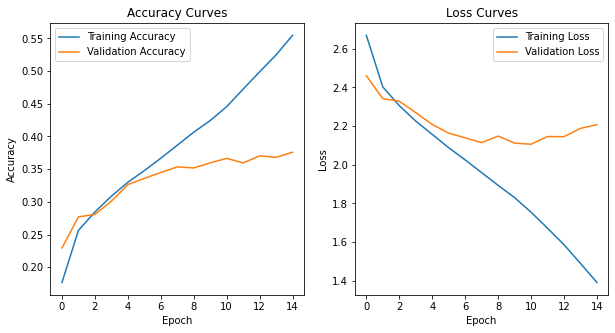

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3072)              9440256   
_________________________________________________________________
dense_1 (Dense)              (None, 4095)              12583935  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2097152   
_________________________________________________________________
dense_3 (Dense)              (None, 20)                10260     
Total params: 24,131,603
Trainable params: 24,131,603
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
accuracy_loss_graph(history)
print(model.summary())

### Display the Confusion Matrix

To help with visualision of models results

The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)


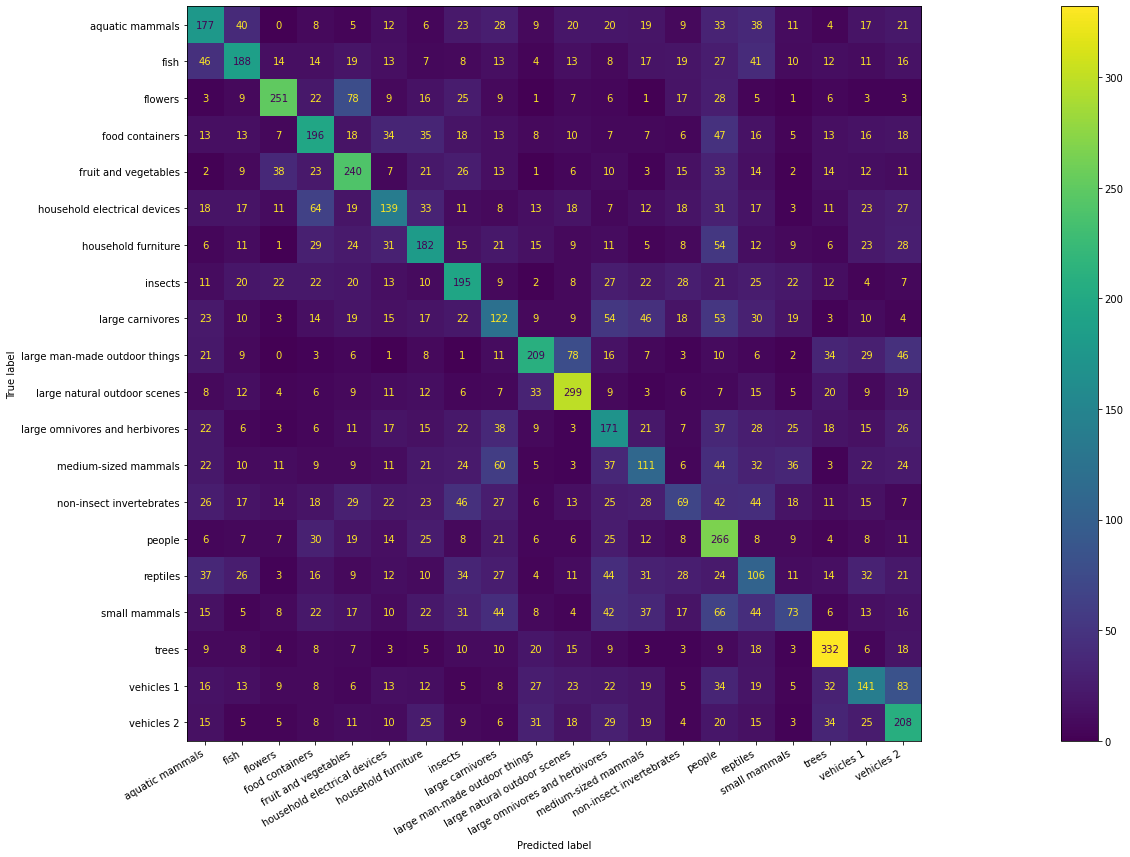

In [6]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()

# preparing the testing dataset for evaluating the DNN model
test_images = np.transpose(test_images,(3,0,1,2))
test_images = np.reshape(test_images, (10000,3072))

#true labels
coarse_labels = pd.read_csv("coarse_labels.csv")

#plots the confusion matrix graph
confusion_graph(model, test_images, test_labels_coarse, coarse_labels)


## Model 2) The Convolutional Neural Network


Below is the Convolutional Neural Network used in the paper, with 2 convo layers, the optimizer was adam with a learing rate set to 0.0001 as its perform best for this experiment compared to others, its loss is sparse categorical crossentropy with metrics set to accuracy.

Fitting the model I went with coarse labels(however fine labels work too), validation_split set to 0.3 , epochs is 15 as that  many was enough to get close to the benchmark however if I used many more the model will be overfitting.

I will use the results of this models and compare it between the dnn above (model 1) in order to conduct whether a cnn or dnn performs better for object recognition

In [7]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()

# preparing the training dataset for this model
train_images = np.transpose(train_images, (3,0,1,2))


# Define Sequential model with 2 convo layers followed by 1 hidden layer for classfication
# Building a tenser flow keras model
model_2 = Sequential()

model_2.add(Conv2D(input_shape=(32, 32, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(units=512,activation="relu"))
model_2.add(Dropout(0.4))
model_2.add(Dense(units=20, activation="softmax"))

# Compiling the model
opt = tf.keras.optimizers.Adam(lr=0.0001)
model_2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training the model
history_2 = model_2.fit(train_images, train_labels_coarse, epochs=15, validation_split=0.3)



The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)
Epoch 1/15
1094/1094 [==============================] - 74s 67ms/step - loss: 2.6316 - accuracy: 0.1933 - val_loss: 2.3900 - val_accuracy: 0.2937
Epoch 2/15
1094/1094 [==============================] - 75s 68ms/step - loss: 2.3203 - accuracy: 0.2912 - val_loss: 2.2155 - val_accuracy: 0.3347
Epoch 3/15
1094/1094 [==============================] - 73s 67ms/step - loss: 2.1700 - accuracy: 0.3350 - val_loss: 2.0935 - val_accuracy: 0.3679
Epoch 4/15
1094/1094 [==============================] - 74s 68ms/step - loss: 2.0685 - accuracy: 0.3632 - val_loss: 1.9935 - val_accuracy: 0.3949
Epoch 5/15
1094/1094 [==============================] - 79s 72ms/step - loss: 1.9853 - 

### Evaluating the accurracy of the Trained Converlutional Neural Net with the Test dataset and its Labels 

In [8]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()
# preparing the testing dataset for evaluating the CNN model
test_images = np.transpose(test_images,(3,0,1,2))
# evaluating the model with teh test set and its labels
pred_2 = model_2.evaluate(test_images, test_labels_coarse)

print("Test dataset results: [loss , accuracy] = ", pred_2)

The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)
313/313 [==============================] - 4s 14ms/step - loss: 1.5902 - accuracy: 0.5138
Test dataset results: [loss , accuracy] =  [1.5902057886123657, 0.5138000249862671]


### Display the Accuracy Loss Graph and Summary of model

The purpose is to view how well the model progressed throughout the training process and its performace inorder to compare with the above dnn

In addition the summary of the model is outputed

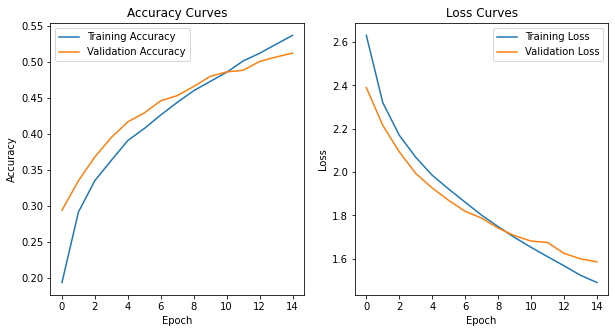

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

In [9]:
accuracy_loss_graph(history_2)
print(model_2.summary())

### Display the Confusion Matrix

To help with visualision of models results

The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)


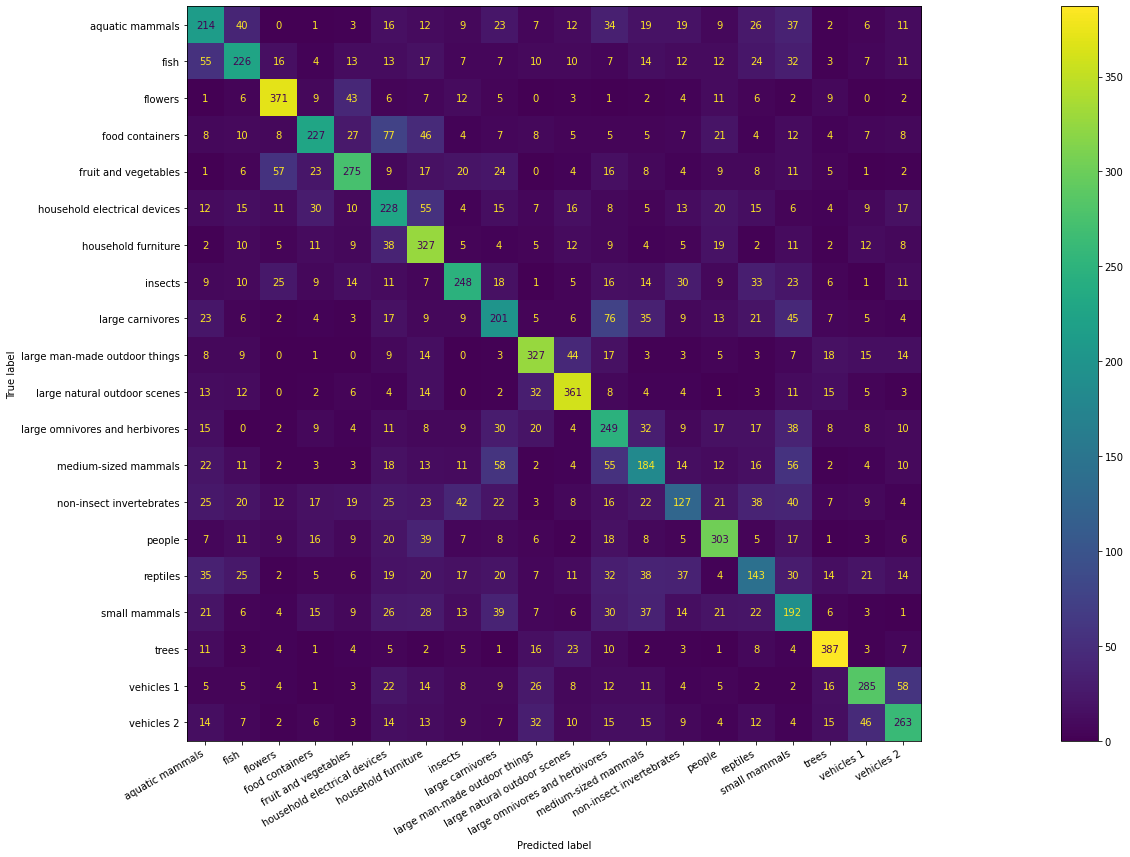

In [10]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()

# preparing the testing dataset for evaluating the DNN model
test_images = np.transpose(test_images,(3,0,1,2))

#true labels 
coarse_labels = pd.read_csv("coarse_labels.csv")
#plots the confusion matrix graph
confusion_graph(model_2, test_images, test_labels_coarse, coarse_labels)

## Model 3: Neural Network

The reason why this model is created is to show the accurracy and speed comparision between a Neural Network and a Deep Neural Network model (above). Model 3 shares a similar setup as Model 1 however it has just one hidden layer which is in essence the difference between a Neural Network and a Deep Nueral Network.


In [11]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()

# preparing the training dataset for this model
train_images = np.transpose(train_images, (3,0,1,2))
train_images = np.reshape(train_images, (50000,3072))


# training a Tensorflow fully connected NN

# Define Sequential model with 1 hidden layers
# Building a tenser flow keras model
model_3 = Sequential()
model_3.add(Dense(train_images.shape[1],activation='relu'))
model_3.add(Dense(4096,activation='relu'))
model_3.add(Dense(20, activation='softmax'))

# sets Compiler for model
opt = tf.keras.optimizers.Adamax()
model_3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_3 = model_3.fit(train_images, train_labels_coarse, validation_split=0.3, epochs=15)
#displays summary
print(model_3.summary())


The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)
Epoch 1/15
1094/1094 [==============================] - 94s 86ms/step - loss: 2.6425 - accuracy: 0.1943 - val_loss: 2.4151 - val_accuracy: 0.2477
Epoch 2/15
1094/1094 [==============================] - 95s 87ms/step - loss: 2.3791 - accuracy: 0.2628 - val_loss: 2.3535 - val_accuracy: 0.2797
Epoch 3/15
1094/1094 [==============================] - 94s 86ms/step - loss: 2.2817 - accuracy: 0.2913 - val_loss: 2.2542 - val_accuracy: 0.3049
Epoch 4/15
1094/1094 [==============================] - 95s 87ms/step - loss: 2.2069 - accuracy: 0.3174 - val_loss: 2.2464 - val_accuracy: 0.3036
Epoch 5/15
1094/1094 [==============================] - 96s 88ms/step - loss: 2.1444 - 

#### Evaluating the accurracy of the Neural Network with the Test dataset and its Labels 


In [12]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()

# preparing the testing dataset for this model
test_images = np.transpose(test_images,(3,0,1,2))
test_images = np.reshape(test_images, (10000,3072))

pred_3 = model_3.evaluate(test_images, test_labels_coarse)
print(pred_3)

The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)
313/313 [==============================] - 3s 10ms/step - loss: 2.2013 - accuracy: 0.3526
[2.2012717723846436, 0.35260000824928284]


## Model 4) The Deep Converlutional Neural Network

The reason why this model is created is to show the accurracy and speed comparision between a Convolusional Neural Network model (above) and this Deep Convolusional Neural Network model. This DCNN model is similar to Model 2 (above CNN) however by adding a extra convolutional layer for each convo hidden layer it can thus become a DCNN in order to see if by making the cnn deeper, and training on the same dataset as the above CNN, can it perform just as well or better.

In [13]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()

# preparing the training dataset for this model
train_images = np.transpose(train_images, (3,0,1,2))

# Define Sequential model with 2 deep convo layers followed by 1 hidden layer for classfication
# Building a tenser flow keras model
model_4 = Sequential()

model_4.add(Conv2D(input_shape=(32, 32, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_4.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_4.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_4.add(Dropout(0.25))
model_4.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_4.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_4.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_4.add(Dropout(0.25))
model_4.add(Flatten())
model_4.add(Dense(units=512,activation="relu"))
model_4.add(Dropout(0.4))
model_4.add(Dense(units=20, activation="softmax"))

# sets Compiler for model
opt = tf.keras.optimizers.Adam(lr=0.0001)
model_4.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_4 = model_4.fit(train_images, train_labels_coarse, epochs=15, validation_split=0.3)

#displays summary
print(model_4.summary())

The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)
Epoch 1/15
1094/1094 [==============================] - 199s 182ms/step - loss: 2.5581 - accuracy: 0.2100 - val_loss: 2.2502 - val_accuracy: 0.3053
Epoch 2/15
1094/1094 [==============================] - 197s 180ms/step - loss: 2.1974 - accuracy: 0.3231 - val_loss: 2.0655 - val_accuracy: 0.3664
Epoch 3/15
1094/1094 [==============================] - 196s 179ms/step - loss: 2.0270 - accuracy: 0.3754 - val_loss: 1.9450 - val_accuracy: 0.4003
Epoch 4/15
1094/1094 [==============================] - 193s 177ms/step - loss: 1.8986 - accuracy: 0.4119 - val_loss: 1.8114 - val_accuracy: 0.4355
Epoch 5/15
1094/1094 [==============================] - 195s 178ms/step - loss:

#### Evaluating the accurracy of the Deep Converlutional Neural Network with the Test dataset and its Labels 

In [14]:
train_images, train_labels_coarse, train_labels_fine, test_images, test_labels_coarse, test_labels_fine = load_dataset()
# preparing the testing dataset for evaluating the DCNN model
test_images = np.transpose(test_images,(3,0,1,2))
#evaluates and displays
pred_4 = model_4.evaluate(test_images, test_labels_coarse)
print(pred_4)

The shape of the train_images set is:  (32, 32, 3, 50000)
The shape of the train_labels_coarse set is:  (50000,)
The shape of the train_labels_fine set is:  (50000,)
The shape of the test_images set is:  (32, 32, 3, 10000)
The shape of the test_labels_coarse set is:  (10000,)
The shape of the test_labels_fine set is:  (10000,)
313/313 [==============================] - 13s 43ms/step - loss: 1.5036 - accuracy: 0.5524
[1.5036447048187256, 0.5523999929428101]
